In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [17]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [19]:
y=train['count']

In [7]:
tr=train.drop(['count'],axis=1)
tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1


In [9]:
data=pd.concat([tr,test],sort=False,axis=0)

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1


In [11]:
# extracting date, hour and month from the datetime
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [12]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,2011-01-01,4,1


In [13]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
date          0
hour          0
month         0
dtype: int64

In [31]:
train=data.iloc[:12980,:]
train['count']=y
train

G:\AI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,2011-01-01,0,1,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,2011-01-01,1,1,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,2011-01-01,2,1,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,2011-01-01,3,1,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,2011-01-01,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,2012-06-29,20,6,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,2012-06-29,21,6,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,2012-06-29,22,6,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,2012-06-29,23,6,48


In [33]:
train.shape

(12980, 15)

In [36]:
test=data.iloc[12980:,:]
test.shape

(4399, 14)

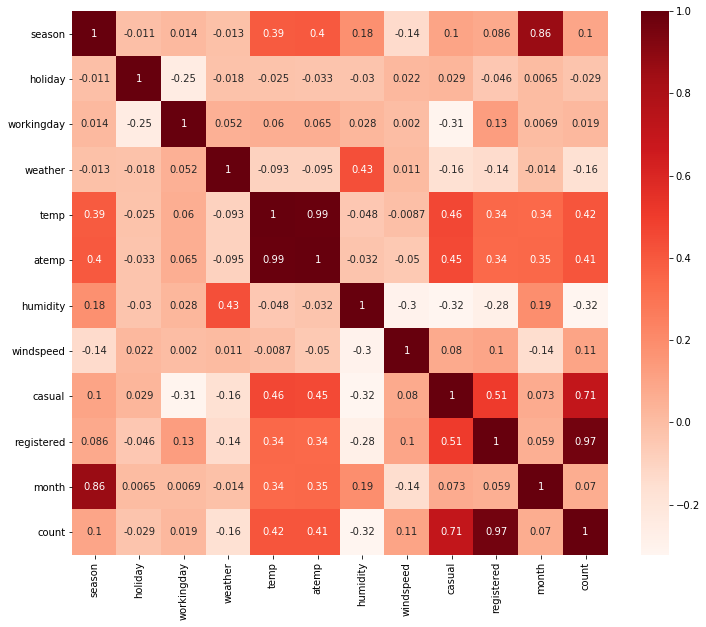

In [26]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=train.corr()
sn.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

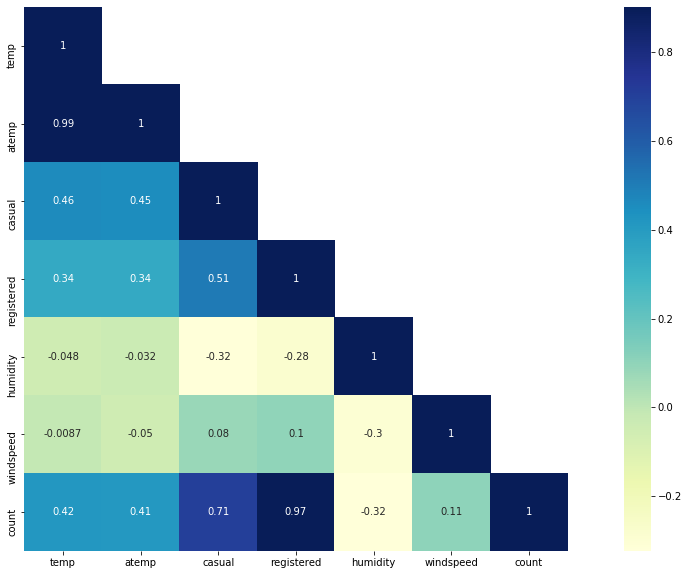

In [27]:
# looking at the correlation between numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [37]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'],axis=1)

In [38]:
X = train.drop('count', 1)
y = np.log(train['count'])

In [39]:
train_len=int(0.8*(train.shape[0]))
train_x,train_y=X[:train_len],y[:train_len]
test_x,test_y=X[train_len:],y[train_len:]

In [46]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=19,min_samples_leaf = 1)

In [106]:
dt_reg.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=19,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
predict = dt_reg.predict(test_x)

In [108]:
# calculating rmsle of the predicted values
rmsle(test_y, predict)

0.05283910993647751

In [ ]:
0.05283910993647751-19

In [109]:
test_prediction = dt_reg.predict(test)

In [110]:
final_prediction = np.exp(test_prediction)

In [111]:
submission = pd.DataFrame()

In [112]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [113]:
submission.to_csv('submission.csv', header=True, index=False)